# 01. EDA для VK EdTech ML Challenge

В этом ноутбуке:
* загружаем исходные данные (`users`, `history`, `validate`, `validate_answers`);
* делаем базовый EDA по таргетам и демографии пользователей;
* готовим понимание для последующего Feature Engineering и моделирования.


# ЭТАП 1. Импорт библиотек и задание путей

In [10]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Глобальный seed для воспроизводимости
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Путь к данным (как в исходном ноутбуке VK_2_3.ipynb)
FOLDER = "/content/drive/MyDrive/VK_Project_v2"

print("FOLDER:", FOLDER)

FOLDER: /content/drive/MyDrive/VK_Project_v2


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

# ЭТАП 2. Загрузка данных из .tsv

In [11]:
users = pd.read_csv(os.path.join(FOLDER, "users.tsv"), sep="\t")
history = pd.read_csv(os.path.join(FOLDER, "history.tsv"), sep="\t")
validate = pd.read_csv(os.path.join(FOLDER, "validate.tsv"), sep="\t")
validate_answers = pd.read_csv(os.path.join(FOLDER, "validate_answers.tsv"), sep="\t")

print(f"users: shape {users.shape}, колонки: {users.columns.tolist()}")
print(f"history: shape {history.shape}, колонки: {history.columns.tolist()}")
print(f"validate: shape {validate.shape}, колонки: {validate.columns.tolist()}")
print(f"validate_answers: shape {validate_answers.shape}, колонки: {validate_answers.columns.tolist()}")

users: shape (27769, 4), колонки: ['user_id', 'sex', 'age', 'city_id']
history: shape (1147857, 4), колонки: ['hour', 'cpm', 'publisher', 'user_id']
validate: shape (1008, 6), колонки: ['cpm', 'hour_start', 'hour_end', 'publishers', 'audience_size', 'user_ids']
validate_answers: shape (1008, 3), колонки: ['at_least_one', 'at_least_two', 'at_least_three']


# ЭТАП 3. Быстрый просмотр примеров строк

In [12]:
print("\n== Примеры данных (users) ==")
display(users.head())

print("\n== Примеры данных (history) ==")
display(history.head())

print("\n== Примеры данных (validate) ==")
display(validate.head())

print("\n== Примеры данных (validate_answers) ==")
display(validate_answers.head())


== Примеры данных (users) ==


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4



== Примеры данных (history) ==


,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148



== Примеры данных (validate) ==


,cpm,hour_start,hour_end,publishers,audience_size,user_ids
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."



== Примеры данных (validate_answers) ==


,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270


# ЭТАП 4. EDA по таргетам validate_answers

,at_least_one,at_least_two,at_least_three
count,1008.000000,1008.000000,1008.000000
mean,0.115441,0.065805,0.047170
std,0.146146,0.117812,0.099029
min,0.000000,0.000000,0.000000
25%,0.016650,0.000000,0.000000
50%,0.055250,0.009800,0.001400
75%,0.158700,0.078125,0.048950
max,0.930700,0.909700,0.883400


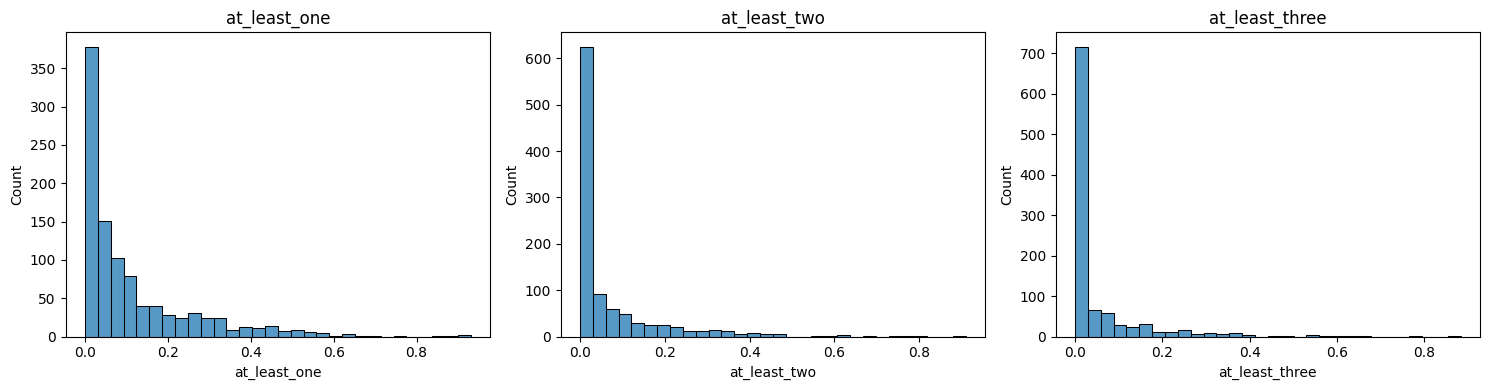

In [13]:
target_cols = ["at_least_one", "at_least_two", "at_least_three"]

display(validate_answers[target_cols].describe())

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, target_cols):
    sns.histplot(validate_answers[col], bins=30, kde=False, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# ЭТАП 5. EDA по демографии пользователей

,user_id,sex,age,city_id
count,27769.000000,27769.000000,27769.000000,27769.000000
mean,13884.000000,1.475134,28.894847,240.141165
std,8016.364149,0.501549,18.510084,466.122195
min,0.000000,0.000000,0.000000,0.000000
25%,6942.000000,1.000000,18.000000,0.000000
50%,13884.000000,1.000000,27.000000,25.000000
75%,20826.000000,2.000000,36.000000,231.000000
max,27768.000000,2.000000,118.000000,2456.000000


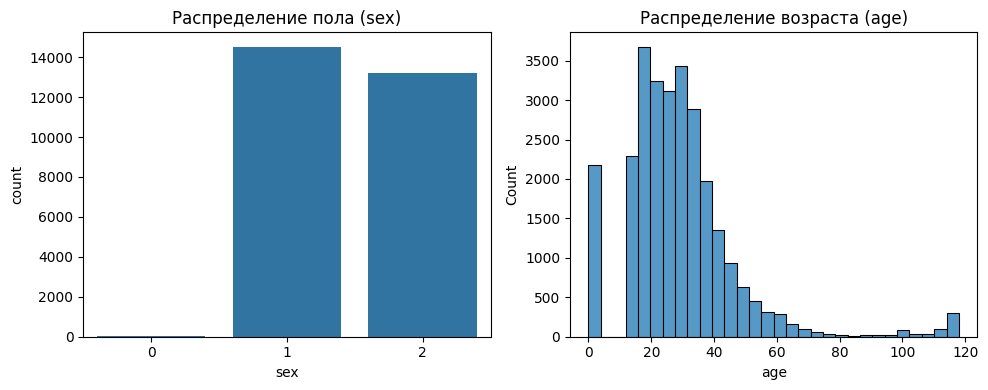

In [14]:
display(users.describe())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=users, x="sex", ax=axes[0])
axes[0].set_title("Распределение пола (sex)")

sns.histplot(data=users, x="age", bins=30, ax=axes[1])
axes[1].set_title("Распределение возраста (age)")

plt.tight_layout()
plt.show()